In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('/content/drive/MyDrive/week3 housing/housing.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#copying the dataset
df_copy = df.copy()


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#taking the information of the data

In [ ]:
#kasto data chha vanera informatin leko
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#data ko summary nikaleko
df_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [ ]:
#data ko kati rows ra columns chha check gareko
print(df_copy.shape)

(20640, 10)


In [ ]:
#null value check gareko
df_copy.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#duplicate kei chha ki chhaina check gareko
print(df_copy.duplicated().sum())

0


In [ ]:
#null value lai mean le add gareko
df_copy["total_bedrooms"].fillna(df_copy["total_bedrooms"].mean(),inplace = True)

<ipython-input-50-3484352627>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["total_bedrooms"].fillna(df_copy["total_bedrooms"].mean(),inplace = True)


In [ ]:
#mean halesi null chha ki chhaina check gareko
df_copy.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.nunique()

,0
longitude,844
latitude,862
housing_median_age,52
total_rooms,5926
total_bedrooms,1923
population,3888
households,1815
median_income,12928
median_house_value,3842
ocean_proximity,5


In [ ]:
#population anusar data lai arrange gareko
df.sort_values(by = 'population', ascending = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15360,-117.42,33.35,14.00,25135.00,4819.00,35682.00,4769.00,2.57,134400.00,<1H OCEAN
9880,-121.79,36.64,11.00,32627.00,6445.00,28566.00,6082.00,2.31,118800.00,<1H OCEAN
13139,-121.44,38.43,3.00,39320.00,6210.00,16305.00,5358.00,4.95,153700.00,INLAND
10309,-117.74,33.89,4.00,37937.00,5471.00,16122.00,5189.00,7.49,366300.00,<1H OCEAN
6057,-117.78,34.03,8.00,32054.00,5290.00,15507.00,5050.00,6.02,253900.00,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
18210,-122.06,37.39,26.00,18.00,4.00,8.00,4.00,3.75,375000.00,NEAR BAY
14822,-117.12,32.66,52.00,16.00,4.00,8.00,3.00,1.12,60000.00,NEAR OCEAN
3126,-117.79,35.21,4.00,2.00,2.00,6.00,2.00,2.38,137500.00,INLAND
12458,-114.62,33.62,26.00,18.00,3.00,5.00,3.00,0.54,275000.00,INLAND


In [ ]:
#data types check gareko
df_copy.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
#repeat nahune unique value check gareko
df_copy["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
#string lai intigers ma chnage garera mapping gareko
mapping = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df_copy['ocean_proximity'] = df_copy['ocean_proximity'].map(mapping)


In [ ]:
#data ko correlaton check gareko ek arka sanga kati dependent chha vanera
df_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,0.18
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,-0.07
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,-0.20
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,0.01
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.87,0.97,-0.01,0.05,0.00
population,0.10,-0.11,-0.30,0.86,0.87,1.00,0.91,0.00,-0.02,-0.01
households,0.06,-0.07,-0.30,0.92,0.97,0.91,1.00,0.01,0.07,-0.02
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,-0.13
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,-0.21
ocean_proximity,0.18,-0.07,-0.20,0.01,0.00,-0.01,-0.02,-0.13,-0.21,1.00


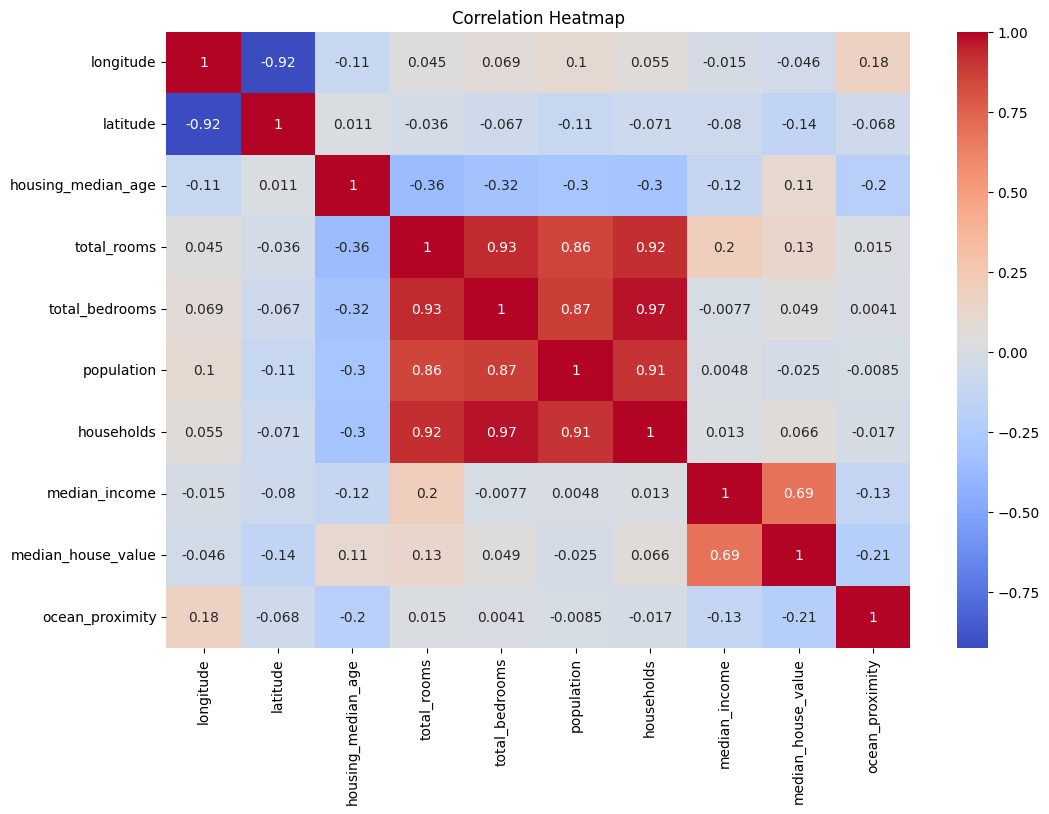

In [ ]:
#heatmap ma correlation check gareko
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#price anusar rakheko range betn 100k-500k
df_copy['price_bin'] = pd.cut(df_copy['median_house_value'], bins=[0, 100000, 200000, 300000, 400000, 500001],
                               labels=['<100K', '100-200K', '200-300K', '300-400K', '400K+'])


In [ ]:
#crouping the clumns by price bin
df_copy.groupby('price_bin').mean(numeric_only=True).sort_values(by='median_house_value', ascending=True)


<ipython-input-60-1318312841>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby('price_bin').mean(numeric_only=True).sort_values(by='median_house_value', ascending=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
price_bin,,,,,,,,,,
<100K,-119.79,36.67,28.72,2019.07,446.71,1204.60,401.77,2.31,76505.03,1.88
100-200K,-119.30,35.45,27.42,2558.27,547.58,1538.78,506.11,3.30,150888.31,1.47
200-300K,-119.65,35.35,28.40,2921.11,583.77,1508.23,551.34,4.34,244324.50,1.30
300-400K,-119.89,35.47,30.13,3078.97,568.15,1381.86,536.26,5.23,345294.17,1.25
400K+,-119.78,35.31,33.13,2967.93,518.44,1172.41,484.65,6.93,475000.55,1.27


In [ ]:
#median house value ko summary kasto chha chek gareko
df_copy['median_house_value'].describe()


,median_house_value
count,20640.00
mean,206855.82
std,115395.62
min,14999.00
25%,119600.00
50%,179700.00
75%,264725.00
max,500001.00


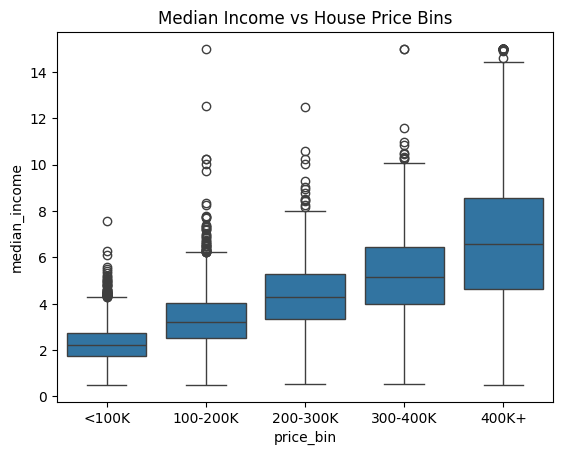

In [ ]:
sns.boxplot(x='price_bin', y='median_income', data=df_copy)
plt.title("Median Income vs House Price Bins")
plt.show()

In [ ]:
df2 = df_copy.groupby('price_bin')[['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'median_house_value', 'ocean_proximity']].mean(numeric_only=True).sort_values(by='median_house_value', ascending=True)
df2

<ipython-input-63-2801067720>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df_copy.groupby('price_bin')[['longitude', 'latitude', 'housing_median_age', 'households',


,longitude,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity
price_bin,,,,,,,
<100K,-119.79,36.67,28.72,401.77,2.31,76505.03,1.88
100-200K,-119.30,35.45,27.42,506.11,3.30,150888.31,1.47
200-300K,-119.65,35.35,28.40,551.34,4.34,244324.50,1.30
300-400K,-119.89,35.47,30.13,536.26,5.23,345294.17,1.25
400K+,-119.78,35.31,33.13,484.65,6.93,475000.55,1.27


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df3 = df2.transpose()
df3

price_bin,<100K,100-200K,200-300K,300-400K,400K+
longitude,-119.79,-119.30,-119.65,-119.89,-119.78
latitude,36.67,35.45,35.35,35.47,35.31
housing_median_age,28.72,27.42,28.40,30.13,33.13
households,401.77,506.11,551.34,536.26,484.65
median_income,2.31,3.30,4.34,5.23,6.93
median_house_value,76505.03,150888.31,244324.50,345294.17,475000.55
ocean_proximity,1.88,1.47,1.30,1.25,1.27


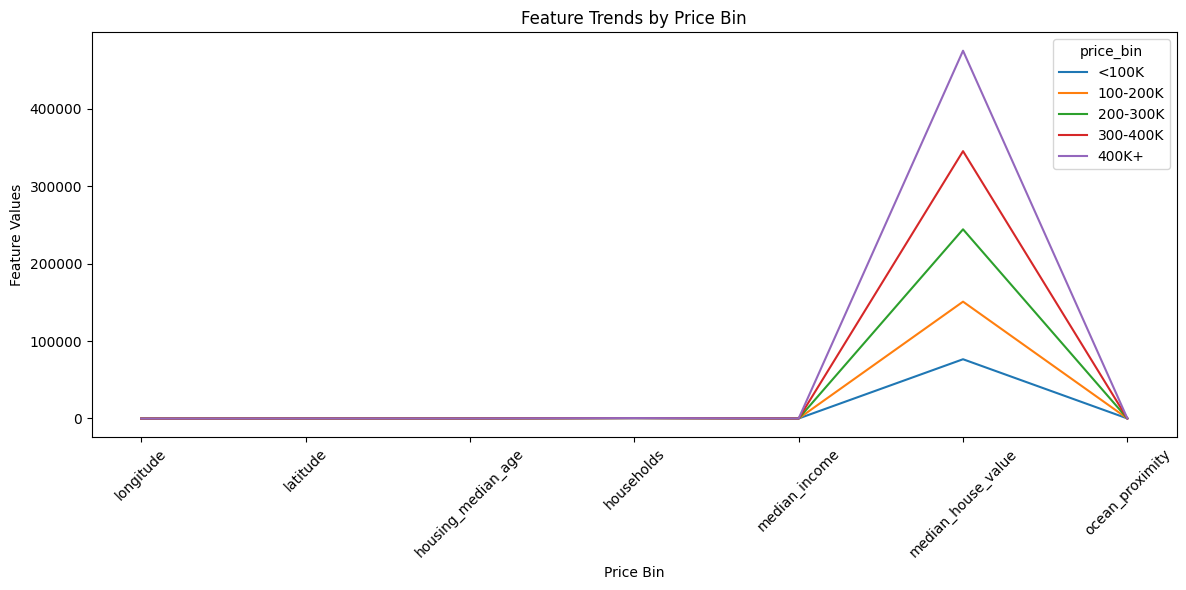

In [ ]:
df3.plot(figsize=(12, 6))
plt.xlabel("Price Bin")
plt.ylabel("Feature Values")
plt.title("Feature Trends by Price Bin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

outliers detection


Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


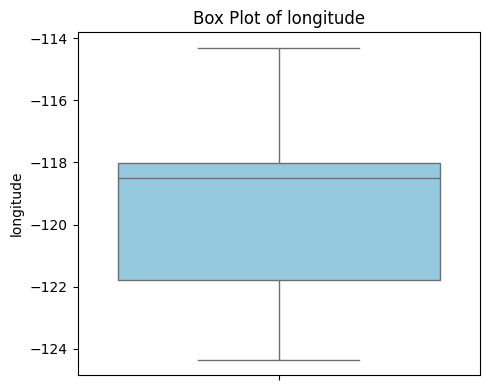

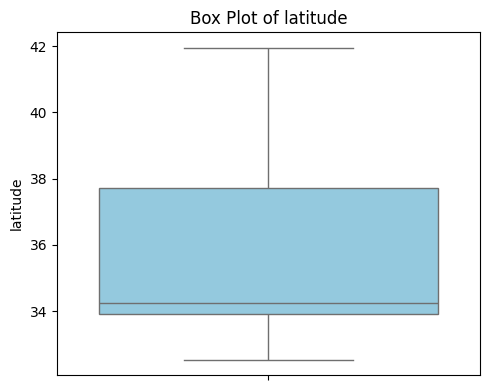

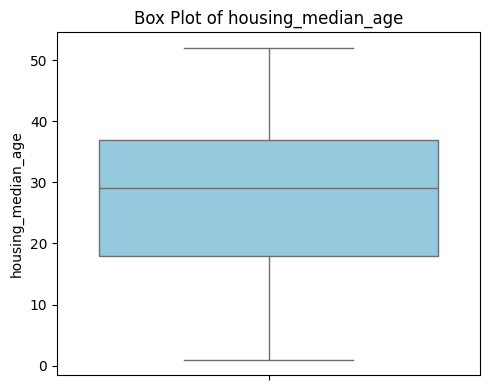

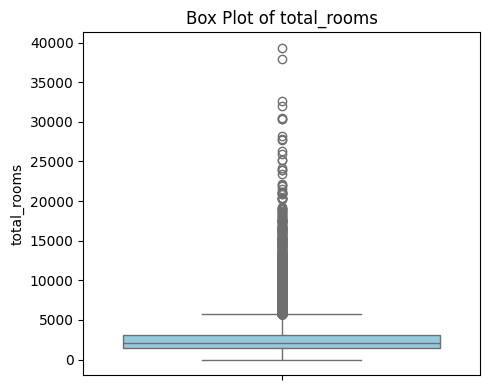

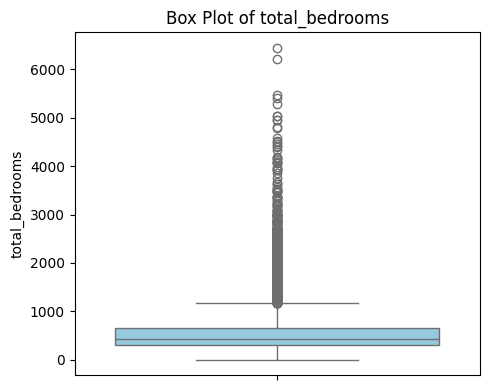

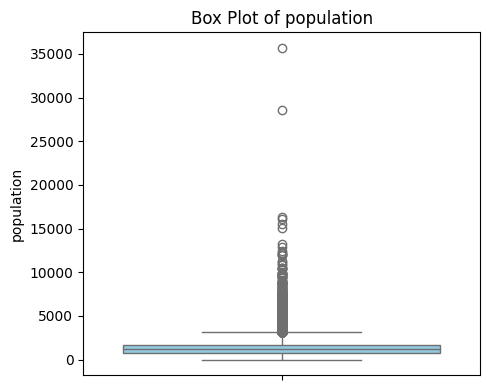

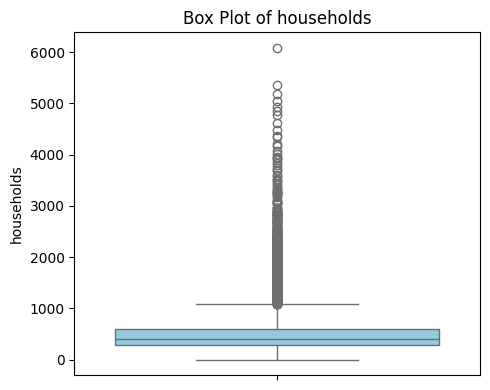

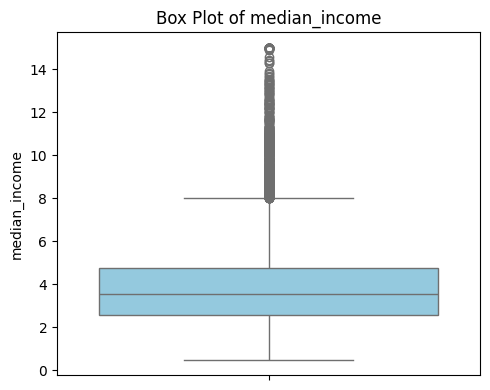

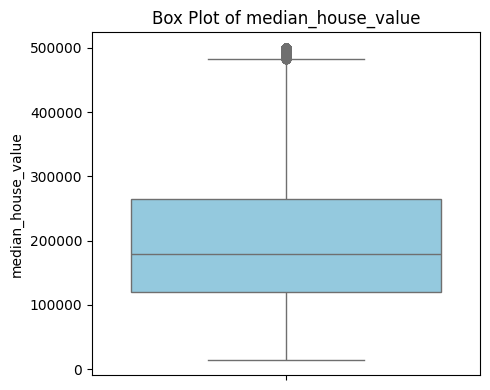

In [ ]:
# Automatically select all numeric columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numerical_cols)

# Plot boxplots for each numeric column
for col in numerical_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


##OUTLIERS HANDLING USING IQR FORMULA

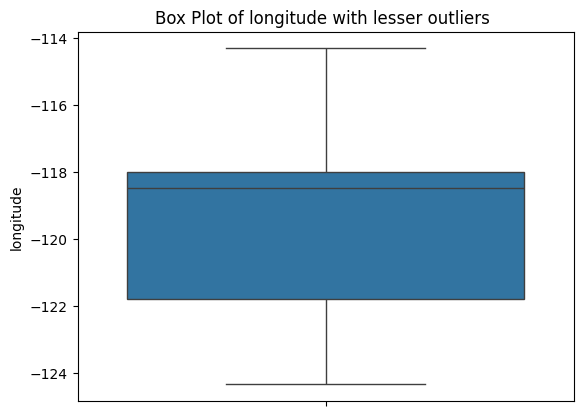

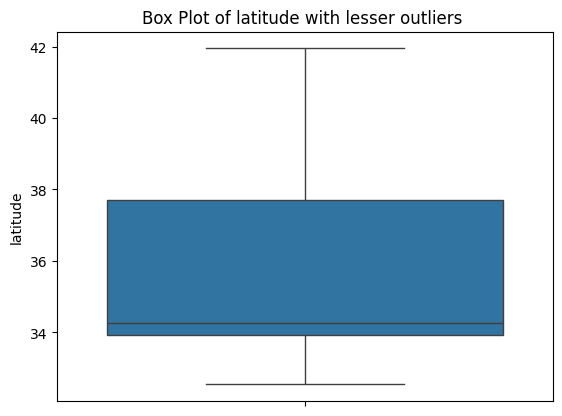

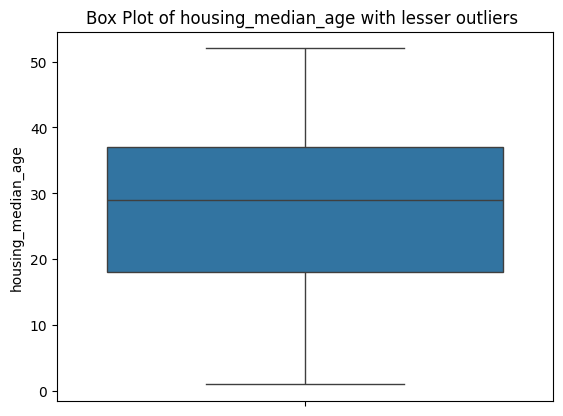

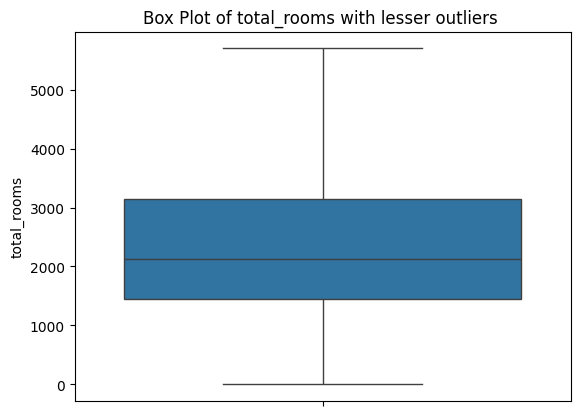

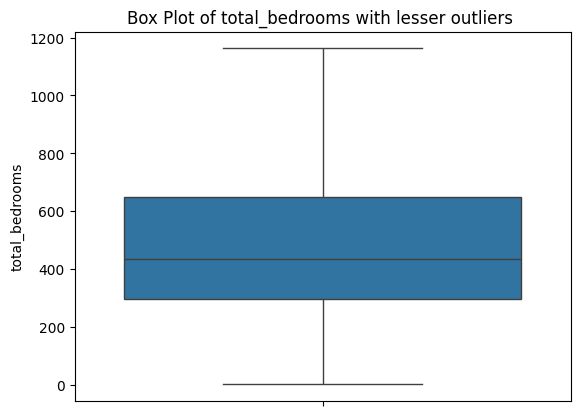

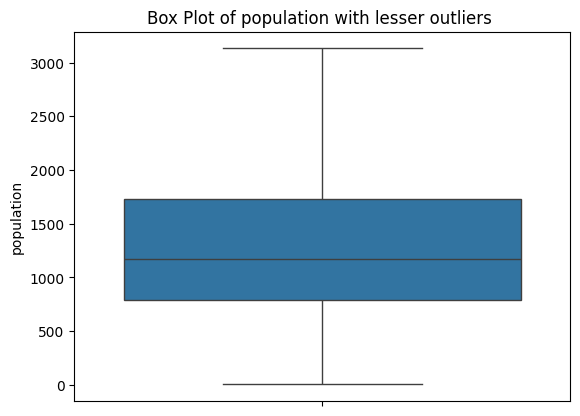

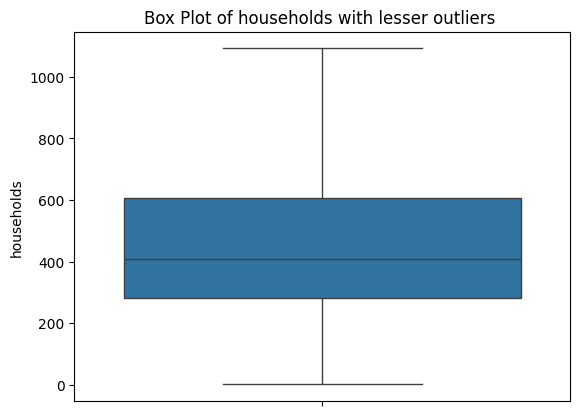

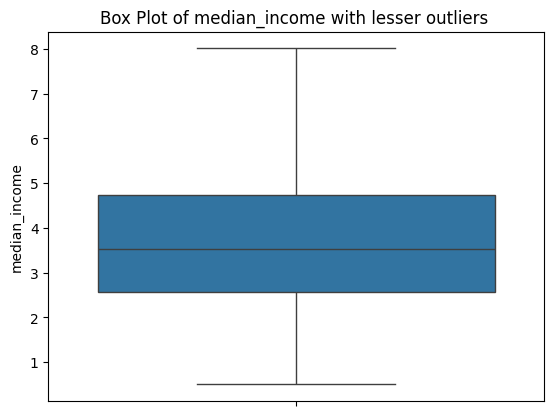

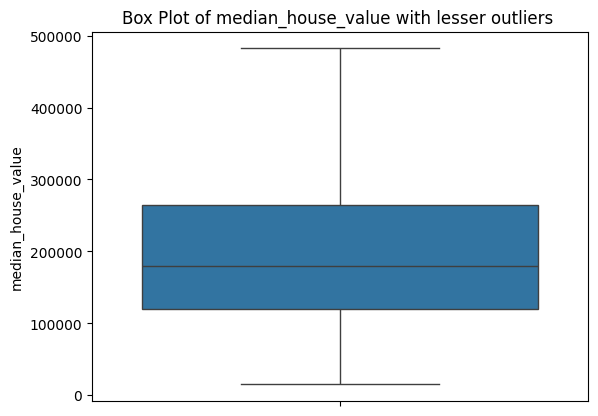

In [ ]:
outlier_bounds = {}
for col in numerical_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outlier_bounds[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit,
    }
  # Cap the outliers
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                            np.where(df[col] > upper_limit, upper_limit, df[col]))
for col in numerical_cols:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col} with lesser outliers ')
    plt.show()

liear regression

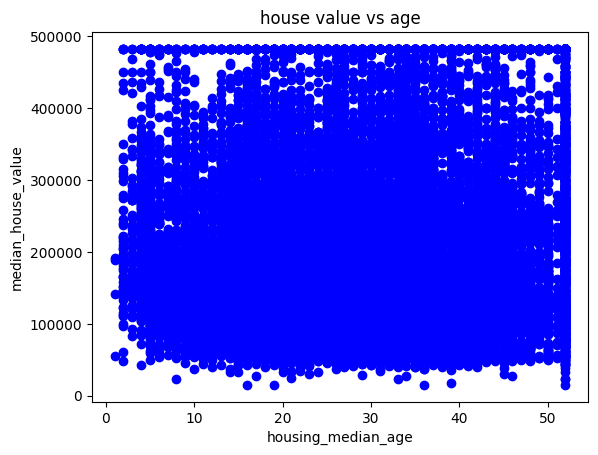

In [ ]:
median_house_value = pd.array(df['housing_median_age']).reshape(-1,1)
housing_median_age=pd.array(df['median_house_value']).reshape(-1,1)

#scatter plot for hours vs study

plt.scatter(median_house_value,housing_median_age,color = 'blue')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.title('house value vs age')
plt.show()


In [ ]:
x = df[['housing_median_age']]
y = df['median_house_value']

In [ ]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Print the split sizes
print("Train set size:", len(x_train))
print("Test set size:", len(x_test))


Train set size: 16512
Test set size: 4128


In [ ]:
#defining linear regression model
model=LinearRegression()

#fitting model
model.fit(x_train,y_train)

LinearRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


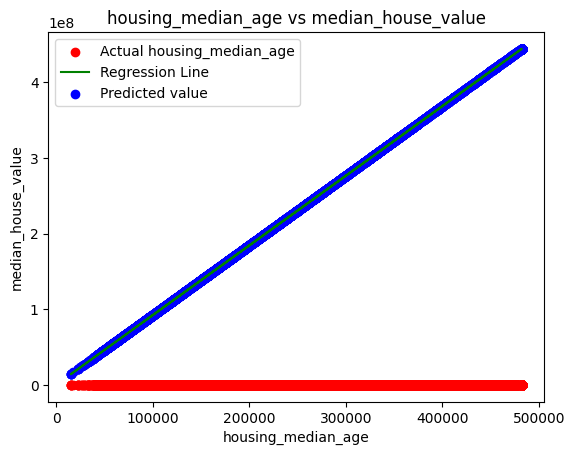

In [ ]:
# visualizing with a regression model

predicted_value=model.predict(housing_median_age)
plt.scatter(housing_median_age,median_house_value,color='red',label='Actual housing_median_age')
plt.plot(housing_median_age,predicted_value,color='green',label='Regression Line')
plt.scatter(housing_median_age,predicted_value,color='blue',label='Predicted value')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.title('housing_median_age vs median_house_value')
plt.legend()
plt.show()

In [ ]:
#evaluate model performance

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


#MSE

train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

#R-squared

train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

print("Train MSE:",train_mse)
print("Test MSE:",test_mse)
print("Train R-squared:",train_r2)
print("Test R-squared:",test_r2)

Train MSE: 12725901515.393406
Test MSE: 12486201892.591593
Train R-squared: 0.010468112735771529
Test R-squared: 0.012445826263361437


In [ ]:
#inferencing(predicting)
model.predict([[1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([180883.67724941])

##decision tree regressor

In [ ]:
dfcopy1=df.copy()

In [ ]:
dfcopy1["total_bedrooms"].fillna(dfcopy1["total_bedrooms"].mean(),inplace = True)

<ipython-input-77-2505295762>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfcopy1["total_bedrooms"].fillna(dfcopy1["total_bedrooms"].mean(),inplace = True)


In [ ]:
le = LabelEncoder()#tool from scikit-learn used to convert categorical labels into numerical values.
dfcopy1['ocean_proximity'] = le.fit_transform(dfcopy1['ocean_proximity'])

In [ ]:
# 3. Define features and target
X = dfcopy1.drop('median_house_value', axis=1)  # Change target column if needed
y = dfcopy1['median_house_value']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
print(X_train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [ ]:
#evaluate model performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


#mse
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


#R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train MSE: 0.0
Test MSE: 4424244111.529978
Train R-squared: 1.0
Test R-squared: 0.6500792814696091


In [ ]:
#inferencing(predicting)
model.predict([[41,245,67,8,1234,67,89,9,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([338700.])

In [ ]:
import pickle
with open('projecthouse.pkl','wb') as file:
  pickle.dump(model,file)